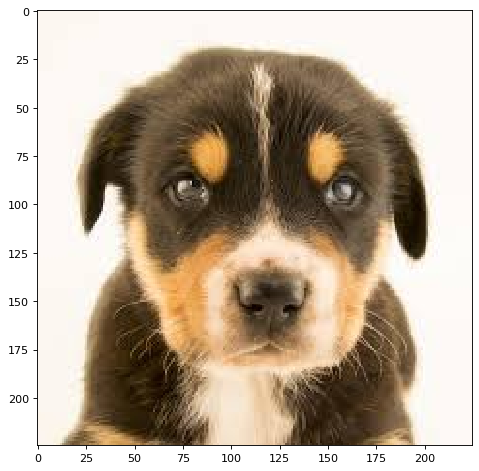

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from scipy.signal import convolve2d
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

# Image Reading and Display
dog = imread("/content/dog1.jpeg")
plt.figure(num=None, figsize=(8,6), dpi=80)
imshow(dog)



In [4]:
# Filter matrices
sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
blur = np.array([[0.11,0.11,0.11],[0.11,0.11,0.11],[0.11,0.11,0.11]])
vertical = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
gaussian = (1/16.0) * np.array([[1,2,1],[2,4,2],[1,2,1]])

Text(0.5, 1.0, 'Vertical')

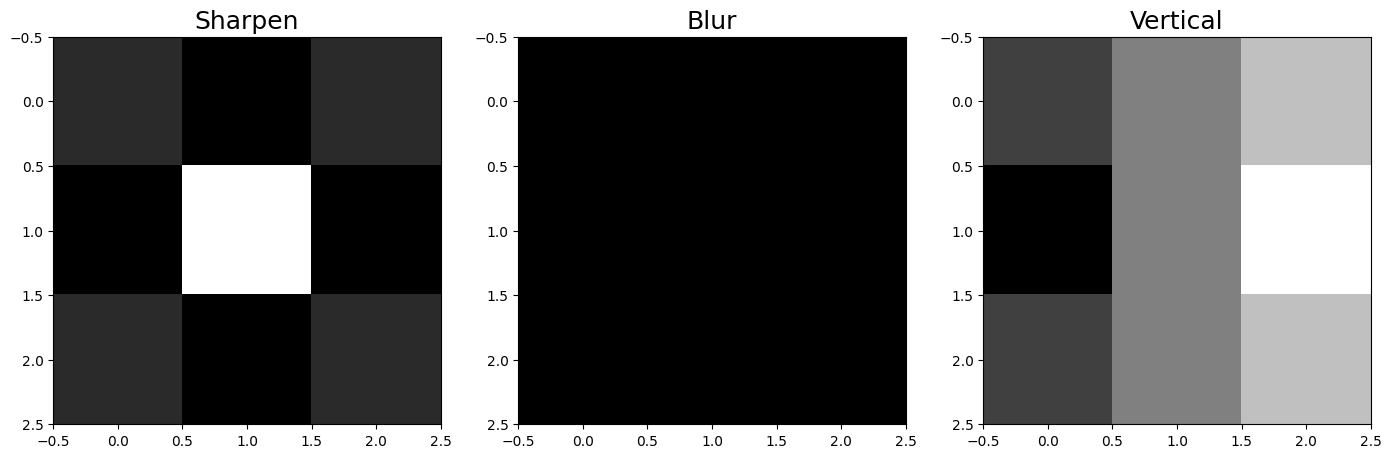

In [5]:
#plotting filters
fig,ax = plt.subplots(1,3, figsize = (17,10))
ax[0].imshow(sharpen, cmap='gray')
ax[0].set_title(f'Sharpen', fontsize=18)

ax[1].imshow(blur, cmap='gray')
ax[1].set_title(f'Blur', fontsize=18)

ax[2].imshow(vertical, cmap='gray')
ax[2].set_title(f'Vertical', fontsize=18)

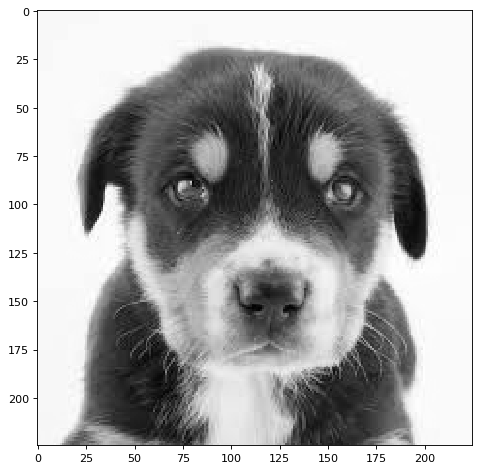

In [6]:
# Grayscaling Image
dog_gray = rgb2gray(dog)
plt.figure(num=None, figsize=(8,6), dpi=80)
imshow(dog_gray)

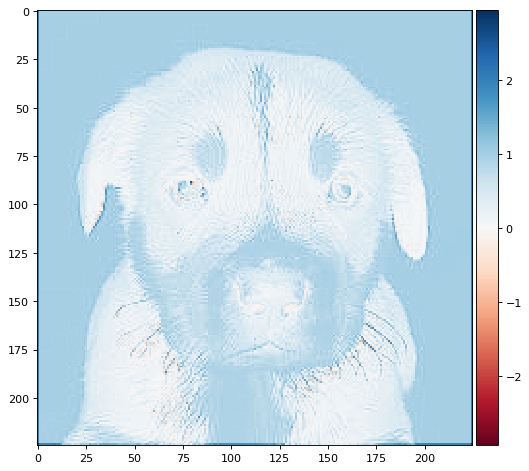

In [7]:
# Applying Sharpen Filter
convolved_image = multi_convolver(dog_gray, sharpen, 1)
plt.figure(num=None, figsize=(8,6), dpi=80)
imshow(convolved_image)

In [8]:
# Convolution Function for Grayscale Image
def multi_convolver(image, kernel, iterations=1):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary='fill', fillvalue=0)
    return image

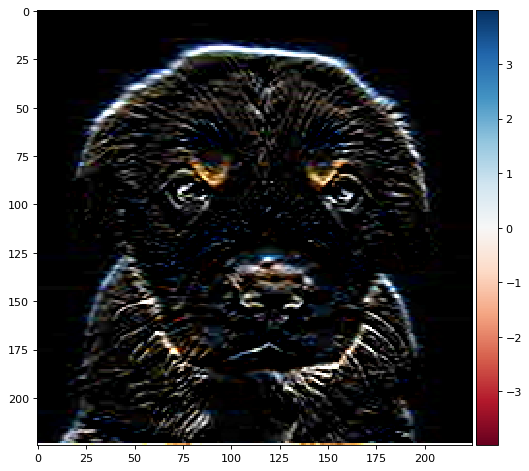

In [9]:
# Applying Vertical Filter to RGB Image
convolved_rgb_image = convolver_rgb(dog, vertical.T, 1)
plt.figure(num=None, figsize=(8,6), dpi=80)
imshow(convolved_rgb_image)

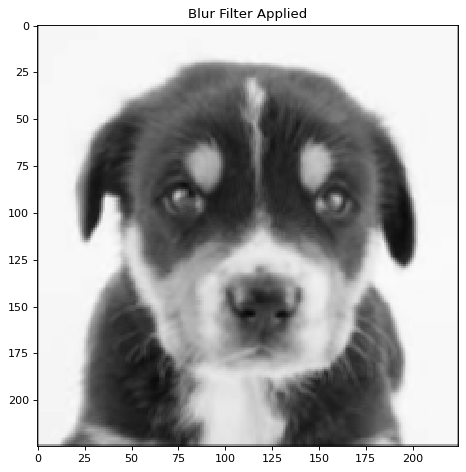

In [10]:
# Apply the blur filter
convolved_image_blur = multi_convolver(dog_gray, blur, 1)
plt.figure(num=None, figsize=(8,6), dpi=80)
plt.title("Blur Filter Applied")
imshow(convolved_image_blur)
plt.show()

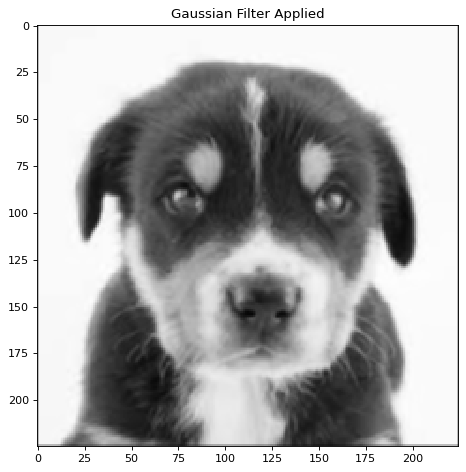

In [11]:
# Apply the Gaussian filter
convolved_image_gaussian = multi_convolver(dog_gray, gaussian, 1)
plt.figure(num=None, figsize=(8,6), dpi=80)
plt.title("Gaussian Filter Applied")
imshow(convolved_image_gaussian)
plt.show()

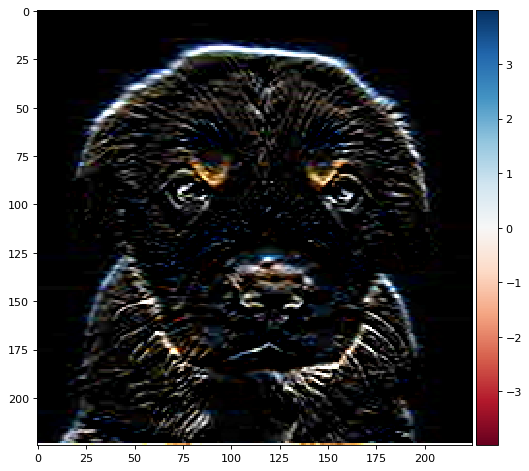

In [12]:
# Convolution Function for RGB Images
def convolver_rgb(image, kernel, iterations=1):
    convolved_image_r = multi_convolver(image[:,:,0], kernel, iterations)
    convolved_image_g = multi_convolver(image[:,:,1], kernel, iterations)
    convolved_image_b = multi_convolver(image[:,:,2], kernel, iterations)
    reformed_image = np.dstack((convolved_image_r, convolved_image_g, convolved_image_b))/255
    return reformed_image

# Applying Vertical Filter to RGB Image
convolved_rgb_image = convolver_rgb(dog, vertical.T, 1)
plt.figure(num=None, figsize=(8,6), dpi=80)
imshow(convolved_rgb_image)

In [14]:
# Building a CNN model
model = Sequential()
model.add(Conv2D(32, input_shape=(28,28,3), kernel_size=(5,5), padding='same', use_bias=False))
model.add(Conv2D(17, (3,3), padding='same', use_bias=False))
model.add(Conv2D(13, (3,3), padding='same', use_bias=False))
model.add(Conv2D(7, (3,3), padding='same', use_bias=False))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

# Another CNN model with different configuration
model = Sequential()
model.add(Conv2D(10, input_shape=(28,28,3), kernel_size=(5,5), strides=(1,1), padding='valid', use_bias=False))
model.add(Conv2D(20, (5,5), strides=(2,2), padding='valid', use_bias=False))
model.add(Conv2D(40, (5,5), strides=(2,2), padding='valid', use_bias=False))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 32)          │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 17)          │           4,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 13)          │           1,989 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 7)           │             819 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,104 (39.47 KB)

 Trainable params: 10,104 (39.47 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 24, 24, 10)          │             750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 10, 10, 20)          │           5,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 3, 3, 40)            │          20,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,750 (100.59 KB)

 Trainable params: 25,750 (100.59 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Max Pooling in TensorFlow
x = tf.constant([[1., 2., 3., 4.],
                 [5., 6., 7., 8.],
                 [9., 10., 11., 12.]])

x = tf.reshape(x, [1, 3, 4, 1])

# Max pooling operation with different configurations
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid')
print(max_pool_2d(x))

max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid')
print(max_pool_2d(x))

max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same')
print(max_pool_2d(x))

tf.Tensor(
[[[[ 6.]
   [ 7.]
   [ 8.]]

  [[10.]
   [11.]
   [12.]]]], shape=(1, 2, 3, 1), dtype=float32)
tf.Tensor(
[[[[6.]
   [8.]]]], shape=(1, 1, 2, 1), dtype=float32)
tf.Tensor(
[[[[ 6.]
   [ 7.]
   [ 8.]
   [ 8.]]

  [[10.]
   [11.]
   [12.]
   [12.]]

  [[10.]
   [11.]
   [12.]
   [12.]]]], shape=(1, 3, 4, 1), dtype=float32)
